In [36]:
import numpy as np
from skimage.io import imread
from skimage.transform import rotate, resize, rescale
from skimage.util import random_noise
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt

In [37]:
image1_path = 'checkerboard.png'
image2_path = 'image2.jpg'

In [38]:
def get_padded_image(bin_image: np.ndarray, kernel: tuple) -> np.ndarray:
    h, w = bin_image.shape
    pad_h, pad_w = kernel[0]//2, kernel[1]//2
    padded_im = np.ones((h + pad_h*2, w + pad_w*2))
    padded_im[pad_h:pad_h + h, pad_w:pad_w + w] = bin_image
    # pad rows at the top and bottom
    padded_im[:pad_h] = padded_im[pad_h]
    padded_im[-pad_h:] = padded_im[-pad_h - 1]
    # pad columns at the left and right end
    padded_im[:, :pad_w] = np.expand_dims(padded_im[:, pad_w], 1)
    padded_im[:, -pad_w:] = np.expand_dims(padded_im[:, -pad_w - 1], 1)
    return padded_im

def convolve(image: np.ndarray, kernel) ->np.ndarray:
    h, w = image.shape
    k_h, k_w = kernel.shape
    padded_image = get_padded_image(image,kernel.shape)
    conv_image = np.zeros(image.shape, dtype=float)
    for i in range(k_h):
        for j in range(k_w):
            conv_image+=padded_image[i:i+h,j:j+w]*kernel[i,j]
    return conv_image

def get_gradients(image: np.ndarray):
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])   #Sobel filter
    Gy = Gx.T
    I_x = convolve(image, Gx)  # Horizontal gradients
    I_y = convolve(image, Gy)  # Vertical gradients
    return [I_x, I_y]

In [39]:
#Harris corner detection code
def harris_corners(image: np.ndarray, window = 10, thresh=10000, k =0.04, overlay = False):
    h,w=image.shape
    I_x, I_y = get_gradients(image)
    I_xy = I_x*I_y

    I_xx = get_padded_image(I_x, (window, window))**2
    I_yy = get_padded_image(I_y, (window, window))**2
    I_xy = get_padded_image(I_xy, (window, window))

    M = np.zeros(image.shape, dtype=float)
    sum_Ixx = np.zeros(image.shape, dtype=float)
    sum_Iyy = np.zeros(image.shape, dtype=float)
    sum_Ixy = np.zeros(image.shape, dtype=float)
    out = np.zeros(image.shape, dtype=np.uint8)

    #Get elements of M for each pixel
    for i in range(window):
        for j in range(window):
            sum_Ixx += I_xx[i:i + h, j:j + w]
            sum_Iyy += I_yy[i:i + h, j:j + w]
            sum_Ixy += I_xy[i:i + h, j:j + w]

    #Compute R
    det = sum_Ixx * sum_Iyy - sum_Ixy**2
    trace = sum_Ixx + sum_Iyy
    R = det - k*(trace**2)

    #Threshold R and return binary corners image
    out[np.where(R>thresh)] = 255     #Threshold to get binary image

    #Overlay thresholded maps
    if overlay:
      out_im = gray2rgb(image)
      out_im[:,:,0][np.where(out>0)]=255
    else: 
      out_im = out

    #Plot image and thresholded maps output of harris detector
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.subplot(122)
    plt.imshow(out_im, cmap='gray')
    plt.title(f'k={window},thr={thresh}')   
    plt.show()
    return out

##Image1: Harris corner detection demo

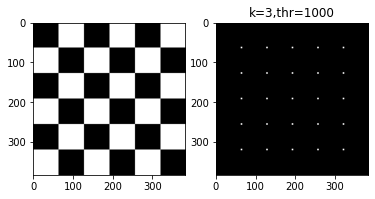

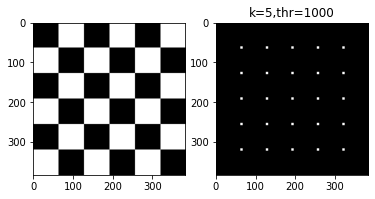

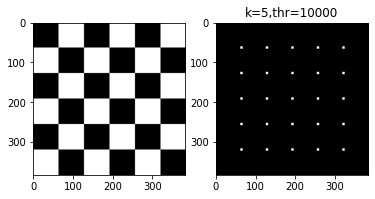

In [40]:
image1 = imread(image1_path)
out = harris_corners(image1, window = 3, thresh=1000, k =0.04)
out = harris_corners(image1, window = 5, thresh=1000, k =0.04)
out = harris_corners(image1, window = 5, thresh=10000, k =0.04)

##Rotate image and apply Harris corner detection

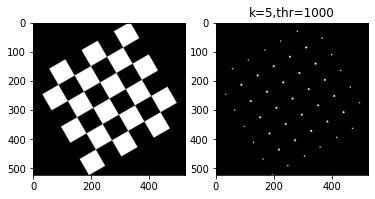

In [41]:
rotated_im = rotate(image1, 30, resize=True)
out = harris_corners(rotated_im, window = 5, thresh=1000, k =0.04)

##Rescale image and apply Harris corner detection

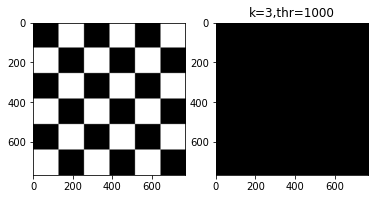

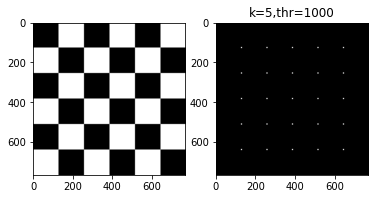

In [42]:
rescaled_im = rescale(image1, 2)
out = harris_corners(rescaled_im, window = 3, thresh=1000, k =0.04)
out = harris_corners(rescaled_im, window = 5, thresh=1000, k =0.04)

##Add gaussian noise to image and apply Harris corner detection

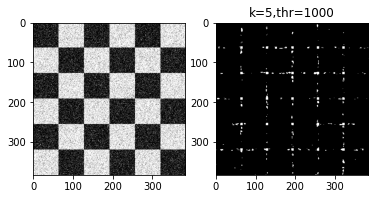

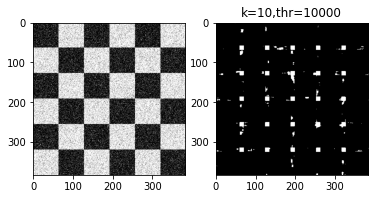

In [43]:
noisy_im = random_noise(image1, mode='gaussian', var=0.1)
out = harris_corners(noisy_im, window = 5, thresh=1000, k =0.04)
out = harris_corners(noisy_im, window = 10, thresh=10000, k =0.04)

##Image2: Harris corner detection demo

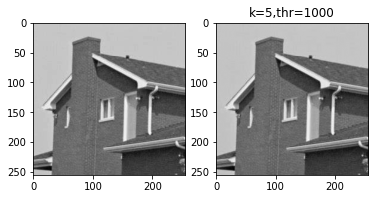

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


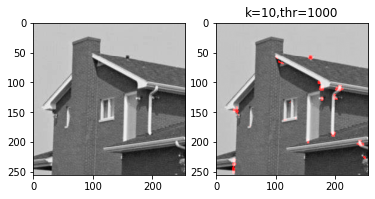

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


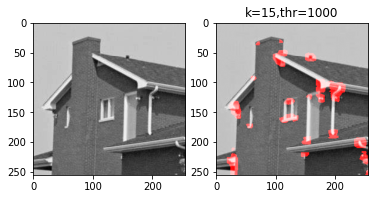

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


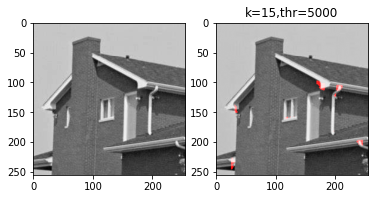

In [44]:
from skimage.color import rgb2gray
image2 = rgb2gray(imread(image2_path))
out = harris_corners(image2, window = 5, thresh=1000, k =0.04, overlay=True)
out = harris_corners(image2, window = 10, thresh=1000, k =0.04, overlay=True)
out = harris_corners(image2, window = 15, thresh=1000, k =0.04, overlay=True)
out = harris_corners(image2, window = 15, thresh=5000, k =0.04, overlay=True)

##Rotate image and apply Harris corner detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


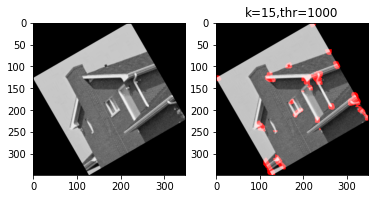

In [45]:
rotated_im = rotate(image2, 30, resize = True)
out = harris_corners(rotated_im, window = 15, thresh=1000, k =0.04, overlay=True)

##Rescale image and apply Harris corner detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


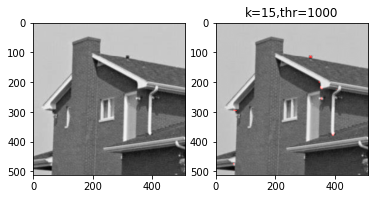

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


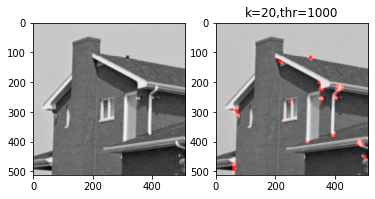

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


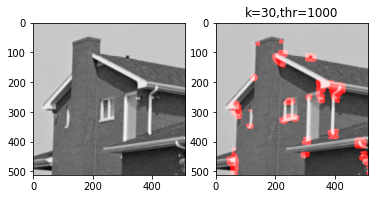

In [46]:
rescaled_im = rescale(image2, 2)
out = harris_corners(rescaled_im, window = 15, thresh=1000, k =0.04, overlay=True)
out = harris_corners(rescaled_im, window = 20, thresh=1000, k =0.04, overlay=True)
out = harris_corners(rescaled_im, window = 30, thresh=1000, k =0.04, overlay=True)

##Add gaussian noise to image and apply Harris corner detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


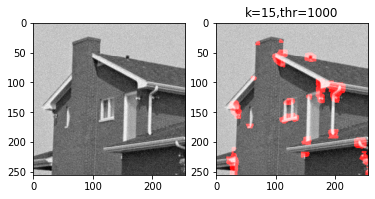

In [47]:
noisy_im = random_noise(image2, mode='gaussian', var=0.001)
out = harris_corners(noisy_im, window = 15, thresh=1000, k =0.04, overlay=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


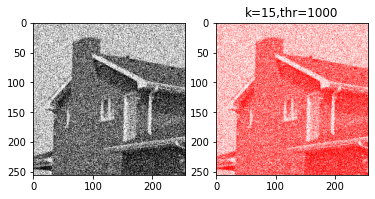

In [48]:
noisy_im = random_noise(image2, mode='gaussian', var=0.05)
out = harris_corners(noisy_im, window = 15, thresh=1000, k =0.04, overlay=True)